In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
exp_data = pd.read_csv("./ExpData.txt", sep="\t")
exp_data = exp_data.set_index("Patient")
snp_data = pd.read_csv("./SnpData.txt", sep="\t")
snp_data = snp_data.set_index("Patient")

# 5000 genes
# 500 SNPs
# 1000 examples

In [3]:
pca = PCA()
exp_data_matrix = exp_data.as_matrix()

In [4]:
transformed = pca.fit_transform(exp_data.as_matrix())

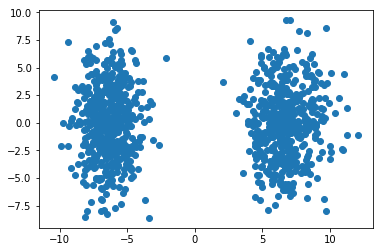

In [5]:
plt.scatter(x=transformed[:, 0], y=transformed[:, 1])

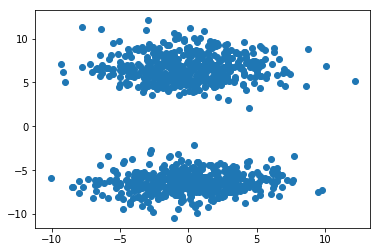

In [6]:
plt.scatter(x=transformed[:, 3], y=transformed[:, 0])

In [7]:
print(np.argmax(pca.components_[0]))
print(pca.components_[0][1135])

1135
0.07005257680912731


In [8]:
snp_data

,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,SNP_9,SNP_10,...,SNP_491,SNP_492,SNP_493,SNP_494,SNP_495,SNP_496,SNP_497,SNP_498,SNP_499,SNP_500
Patient,,,,,,,,,,,,,,,,,,,,,
EAVH_787,0,1,1,1,1,0,2,2,0,0,...,0,1,2,2,1,2,1,2,0,2
MCRX_049,2,0,0,1,0,0,1,1,0,2,...,0,2,0,2,1,2,0,2,1,1
TGHC_696,1,2,2,1,0,2,2,1,2,2,...,2,2,0,1,1,2,0,0,0,0
VCJQ_321,0,1,1,0,1,0,0,0,2,2,...,1,2,2,0,2,0,2,2,2,0
QETF_839,1,1,2,0,0,0,0,0,1,0,...,2,0,0,0,1,2,2,1,1,2
HNZO_585,1,1,1,2,1,1,2,1,2,0,...,2,2,1,1,2,1,0,2,0,1
JTCW_723,0,2,0,0,1,0,1,2,0,2,...,2,0,2,1,1,0,0,2,1,2
BDLV_584,0,1,0,2,1,2,1,1,1,2,...,0,1,0,1,0,0,2,1,0,0
YBND_871,1,0,1,1,1,1,1,0,1,0,...,2,0,2,2,1,2,1,2,1,2


In [9]:
y = list(exp_data["Gene_RTH04"])

In [10]:
X = snp_data.as_matrix()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
for gene in exp_data.columns:
    y = list(exp_data[gene])
    for snp in range(0, 500):
        X0 = X[:, snp].reshape(-1, 1)
        reg = LinearRegression().fit(X0, y)
        score = reg.score(X0, y)
        if score > 1e-2:
            print(gene, snp, score)

/Users/mattfeng/envs/deep/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Gene_RTH04 168 0.011023909742051474
Gene_RTH04 483 0.011954788357975255
Gene_CIC95 371 0.012965898903317452
Gene_GQO03 8 0.010540831504965653
Gene_XTO05 92 0.01405578259845075
Gene_ZPZ69 38 0.0128004554572283
Gene_QLY48 37 0.013422085796815475
Gene_MUO99 114 0.011032737445789698
Gene_TSL41 137 0.010256413686865917
Gene_TSL41 414 0.010956789367512765
Gene_TJV01 19 0.010509925153693422
Gene_TJV01 75 0.010736080650049273
Gene_GIW59 137 0.013888642299312082
Gene_AIU28 45 0.031305876285662504
Gene_AIU28 47 0.01778338254050471
Gene_AIU28 83 0.0239314273452349
Gene_AIU28 111 0.013156720401599431
Gene_AIU28 118 0.0491980407114363
Gene_AIU28 156 0.12440260161054884
Gene_AIU28 210 0.010185388549882157
Gene_AIU28 213 0.0386200451730091
Gene_AIU28 216 0.02392140270606602
Gene_AIU28 229 0.031240826451043428
Gene_AIU28 342 0.035595814720297714
Gene_AIU28 365 0.013524487893799897
Gene_AIU28 433 0.010252754610822201
Gene_AIU28 472 0.04725724731862424
Gene_LGQ06 110 0.010715529898491782
Gene_LGQ06 434 

Gene_FYN78 459 0.012076054348168497
Gene_NBB93 80 0.010095308360390742
Gene_TPO93 341 0.010134064742003956
Gene_VZL36 492 0.013180805445064059
Gene_OEL15 213 0.010565350791352124
Gene_AGQ20 94 0.011244204805399005
Gene_AGQ20 256 0.010967009913309123
Gene_AGQ20 358 0.01113277557083725
Gene_MBD01 48 0.010348057144907385
Gene_SBK92 59 0.011766469084257603
Gene_SBK92 101 0.012921671316962535
Gene_SBK92 224 0.010074077904449252
Gene_SBK92 310 0.01071132535198216
Gene_JQF49 171 0.012091527658531052
Gene_LNW58 383 0.010202893575598115
Gene_WCH46 118 0.012275314771099888
Gene_WCH46 184 0.014507610051584852
Gene_NRH01 92 0.014293759676397899
Gene_YPN95 157 0.01289954919613523
Gene_QJI74 315 0.010790054395115045
Gene_EKT57 224 0.01454792741505695
Gene_CRD75 370 0.013830599711751046
Gene_MMW96 488 0.013415684989681154
Gene_NGY53 341 0.011942805251371924
Gene_OXK76 145 0.012469808003826577
Gene_CFT45 262 0.01026040217943558
Gene_VCI17 384 0.01556622368348537
Gene_VCI17 454 0.012234564281293325
Gen

Gene_PJS74 236 0.010178380066260262
Gene_PJS74 397 0.013313592443277789
Gene_PJS74 454 0.011688624065319342
Gene_PLI08 291 0.011690813797470168
Gene_PLI08 324 0.010968813439932945
Gene_SDL67 33 0.012567747069481161
Gene_SDL67 388 0.010158714853432005
Gene_MLE84 244 0.011986205929763183
Gene_MLE84 280 0.012445086897797998
Gene_JAA81 228 0.013116814383019482
Gene_QCV83 106 0.010147006508464784
Gene_QCV83 266 0.012933904758325343
Gene_ODF77 256 0.011364557677615017
Gene_VMT22 146 0.012214079948987266
Gene_UYY96 268 0.011826177617963118
Gene_UYY96 417 0.010041532762411487
Gene_UYY96 475 0.011337550114609019
Gene_GLH40 332 0.020376880430350575
Gene_DEV74 151 0.01101093243498219
Gene_DEV74 353 0.012210160020627137
Gene_GAY23 385 0.011222064387120367
Gene_EJZ77 85 0.010105134371370728
Gene_ONN83 443 0.011057153583091228
Gene_ICS28 40 0.014265112097295196
Gene_ICS28 185 0.010262368042543546
Gene_LMD90 258 0.011143634912913258
Gene_LMD90 358 0.010322463943413629
Gene_HTL90 179 0.011847010424981

Gene_SZL35 377 0.01171103089980352
Gene_BWO37 79 0.018235884803040725
Gene_BWO37 132 0.012058205659199572
Gene_HDH46 282 0.01030490660699912
Gene_KZE32 317 0.012967913989618385
Gene_IFH26 71 0.014918906676149035
Gene_IFH26 378 0.011453890998012528
Gene_IEL85 280 0.010856664177231301
Gene_RLV96 34 0.010366776824056179
Gene_RLV96 153 0.01270792672500054
Gene_RLV96 421 0.012092701437258713
Gene_LKT08 276 0.011171838276905044
Gene_LKT08 368 0.015176703934861702
Gene_SNE34 104 0.010090808132554585
Gene_AHQ55 253 0.01649136394404882
Gene_KBP59 130 0.01324452527850184
Gene_HLZ69 283 0.011215039069976007
Gene_KNB17 35 0.01137256771498496
Gene_LXX02 368 0.01079994265307205
Gene_TRO00 142 0.014363443873453119
Gene_TRO00 336 0.010843303956915573
Gene_ZJS72 231 0.010512179798572996
Gene_NAI07 365 0.010824967977359767
Gene_UIS09 97 0.012033756003976492
Gene_LUS49 411 0.011193170311185274
Gene_ARJ01 54 0.01013402816325748
Gene_ARJ01 94 0.015647472080784208
Gene_ARJ01 275 0.01909474327463967
Gene_NRA

Gene_OLR92 224 0.010067790033929436
Gene_VEL95 485 0.014218469944444312
Gene_TYZ45 45 0.019434110641700864
Gene_TYZ45 47 0.02370396685823728
Gene_TYZ45 83 0.028654371534171275
Gene_TYZ45 111 0.022107753238353678
Gene_TYZ45 118 0.04084375764238268
Gene_TYZ45 156 0.1163923725569983
Gene_TYZ45 210 0.03166590688648574
Gene_TYZ45 213 0.032935457773603405
Gene_TYZ45 216 0.030285231299020384
Gene_TYZ45 229 0.016371572847700744
Gene_TYZ45 342 0.04162055433320333
Gene_TYZ45 472 0.04519034108563025
Gene_RTN63 226 0.013819045836236943
Gene_XTE91 320 0.013134285253848632
Gene_XHE17 78 0.011519391472847862
Gene_XHE17 351 0.011103180722980666
Gene_GKI99 32 0.011053227356991324
Gene_GKI99 444 0.010553269384769193
Gene_YPU18 172 0.011102936562279342
Gene_NKM09 324 0.010554981159314525
Gene_NKM09 468 0.011089425113949614
Gene_APW25 215 0.010011486335702036
Gene_OKU61 364 0.01090445307735255
Gene_XTB01 97 0.010283135767917728
Gene_XTB01 199 0.013349602701372532
Gene_XTB01 356 0.01011632760687775
Gene_TQ

Gene_LOE40 342 0.0393375975417275
Gene_LOE40 472 0.04950367232632913
Gene_KJY32 15 0.012503304312583952
Gene_NCT49 110 0.012103850616863365
Gene_NCT49 144 0.010633317817601573
Gene_NCT49 205 0.010041415097619466
Gene_RUT46 81 0.012603221586567015
Gene_AEZ29 27 0.014870307235187785
Gene_AEZ29 219 0.012350882157361243
Gene_CJA21 283 0.011746032595187916
Gene_CJA21 481 0.012067428590748164
Gene_FRI58 204 0.0128659971707209
Gene_FRI58 442 0.010746219358531817
Gene_LXU12 264 0.011896413976065667
Gene_UXX42 276 0.010202257166097684
Gene_MFE26 94 0.011046291414336662
Gene_MFE26 151 0.010882159606493191
Gene_MFE26 406 0.01031347082238332
Gene_MFE26 468 0.011101678174706975
Gene_PZH83 233 0.011052398028466026
Gene_LGQ21 216 0.015181110023941846
Gene_RAS16 58 0.012184426272690785
Gene_RAS16 253 0.013369243231461048
Gene_PNB10 99 0.012097260546989452
Gene_PNB10 205 0.010025030512499367
Gene_XEP40 103 0.010080151435503448
Gene_BGX91 49 0.015546503391278168
Gene_BGX91 305 0.01315621895119612
Gene_K

Gene_JCQ78 388 0.01032222798041571
Gene_GDY51 191 0.012927456785685187
Gene_TAZ64 25 0.015387956225434984
Gene_BZR57 90 0.01008251258866355
Gene_YGL06 235 0.010304829504091173
Gene_GEQ94 173 0.01008954519482197
Gene_KYM81 315 0.010111109688801691
Gene_UIQ04 113 0.010773342180619538
Gene_ELT55 135 0.010575915470783959
Gene_RWV70 157 0.010327203223880366
Gene_RWV70 399 0.0103444500689589
Gene_WSW25 61 0.011690579502172005
Gene_WSW25 119 0.010600431164216495
Gene_WSW25 250 0.011221462299351948
Gene_IYL78 454 0.01111789806355934
Gene_RHZ76 81 0.014719831872863742
Gene_RHZ76 421 0.010148325174595518
Gene_HDI19 25 0.010232660036639918
Gene_XSR34 159 0.012169866639189841
Gene_SVD51 143 0.010816813616371879
Gene_LEK61 221 0.010022793097177685
Gene_LEK61 496 0.01363926583013686
Gene_UDO97 495 0.010247754284608113
Gene_RKJ23 330 0.012801814063277628
Gene_UDJ56 80 0.012857988357316108
Gene_UDJ56 272 0.011350659361499593
Gene_RWG53 242 0.011328340001331315
Gene_MUM36 121 0.011666270990770222
Gene_

Gene_FMY06 144 0.010370864446942685
Gene_FMY06 257 0.010779221867231126
Gene_QIN15 45 0.01388041700681719
Gene_QIN15 99 0.012024930695618942
Gene_QIN15 118 0.014565358263260664
Gene_QIN15 156 0.03728643198569892
Gene_QIN15 221 0.020781301817049624
Gene_QIN15 240 0.017561648942255204
Gene_UNB77 89 0.012849426925867435
Gene_VFQ92 213 0.015468459193094808
Gene_VFQ92 377 0.011555634204863274
Gene_FKU52 77 0.010940539148998396
Gene_SPQ34 145 0.011480249315310664
Gene_SPQ34 239 0.01244437805685239
Gene_SPQ34 346 0.012788480093522847
Gene_MZC50 348 0.012632588392949229
Gene_MMF89 284 0.014294072851415263
Gene_AQR51 466 0.010035968730568334
Gene_NLC61 63 0.011359881095093893
Gene_YTZ92 79 0.010191487349150319
Gene_YTZ92 353 0.014509372728569336
Gene_YKC96 4 0.016895555702540088
Gene_YKC96 211 0.011677967190124261
Gene_YKC96 367 0.010198419471746711
Gene_AIS64 31 0.010740552216990884
Gene_AIS64 197 0.0111977145231823
Gene_YTV59 115 0.012029134366276728
Gene_TDL07 92 0.010195344330247269
Gene_GE

Gene_MBK92 280 0.010909094781647921
Gene_MBK92 342 0.015632004488362994
Gene_FSE67 26 0.010079604444825918
Gene_FSE67 220 0.016198889190661814
Gene_FSE67 246 0.016579567896359393
Gene_FSE67 391 0.013694016119506824
Gene_WXQ87 42 0.010660972455328599
Gene_WXQ87 409 0.01042307546677712
Gene_SCU77 297 0.010790433154120871
Gene_NER81 296 0.01170866130102266
Gene_ATW60 249 0.012315817278882424
Gene_PGV64 97 0.01234985622140794
Gene_PGV64 321 0.012269975560545543
Gene_IFV69 30 0.014854295369998272
Gene_GPG98 250 0.01054347018061852
Gene_QLL47 114 0.010348349896150855
Gene_QLL47 143 0.011635490818885152
Gene_QLL47 186 0.01578891792425352
Gene_MWW24 301 0.011239528743172467
Gene_LQE83 45 0.026964622966930918
Gene_LQE83 47 0.013606682610757037
Gene_LQE83 83 0.017642652255814628
Gene_LQE83 111 0.019583551277592925
Gene_LQE83 118 0.04736683688072241
Gene_LQE83 156 0.14199597392006535
Gene_LQE83 210 0.017009871291068235
Gene_LQE83 213 0.014632116260755113
Gene_LQE83 216 0.025594664507880616
Gene_L

Gene_MQT38 342 0.05647698840736315
Gene_MQT38 469 0.012126196264699685
Gene_MQT38 472 0.0358959105452713
Gene_RZT19 171 0.011311800230461633
Gene_RZT19 220 0.013869699210806385
Gene_RZT19 499 0.010289667767693467
Gene_PUM09 259 0.017743208325520565
Gene_ADL53 127 0.012124005979045394
Gene_ADL53 482 0.01108063131267234
Gene_CIH23 100 0.010071392955228853
Gene_MGE43 254 0.011733509228471606
Gene_WKH92 33 0.01175515714710218
Gene_WKH92 45 0.011278171484386701
Gene_IFX87 382 0.017019260999284965
Gene_NPA98 374 0.011718794728547532
Gene_LTS85 375 0.016569272832913873
Gene_ZFD20 45 0.015388773811064405
Gene_ZFD20 118 0.01618343302283176
Gene_ZFD20 156 0.04824836422309208
Gene_ZFD20 221 0.014679009426557754
Gene_ZAD75 117 0.012150381372983632
Gene_LAI46 293 0.01051513215989408
Gene_ODI76 6 0.015220801437952902
Gene_ODI76 379 0.021789767313696418
Gene_YVP16 111 0.010344458340904805
Gene_YVP16 424 0.01169323308146153
Gene_SEN89 436 0.014733046139290829
Gene_SAI41 354 0.013668933106807946
Gene_Z

Gene_ILR27 234 0.010284801113460196
Gene_OGR00 143 0.011448426401785004
Gene_RCS49 4 0.01030856217200804
Gene_RCS49 227 0.010117694088618623
Gene_RCS49 257 0.0112662289120391
Gene_FMA26 355 0.013764928415020639
Gene_JDZ93 141 0.012164822571305578
Gene_PYG01 134 0.010082536605006243
Gene_PYG01 154 0.01256469082418743
Gene_VZG96 310 0.011254714503862062
Gene_WXD79 471 0.010346559442827807
Gene_XVT72 98 0.011080440741127684
Gene_XXV18 86 0.011312141556771849
Gene_DLJ51 21 0.010433227998965067
Gene_VZO55 45 0.010568781042242348
Gene_VZO55 118 0.012399322047998762
Gene_VZO55 156 0.04726105827696481
Gene_VZO55 221 0.013309424292311856
Gene_VZO55 432 0.011509504928847725
Gene_SFY17 56 0.010577793180225115
Gene_DRY08 443 0.012081973809635271
Gene_PBW31 17 0.010761460193200345
Gene_CQR96 176 0.014037368372238013
Gene_CQR96 304 0.013744005868261855
Gene_QPO45 285 0.013830020159830814
Gene_EHZ21 103 0.011237760818126885
Gene_XLO10 156 0.010100936775551794
Gene_MYE20 10 0.011244941725523927
Gene_O

Gene_ZCY01 51 0.010945184156981314
Gene_ZCY01 336 0.012996838143777945
Gene_IDL21 215 0.010204371099747034
Gene_IDL21 234 0.01032214011035315
Gene_SYM59 189 0.014324767249174863
Gene_KPB30 369 0.01125207955666796
Gene_KPB30 387 0.010023722142130875
Gene_KPB30 451 0.010310501944123418
Gene_GGT11 193 0.015162728737759035
Gene_GGT11 373 0.011749704770195435
Gene_ONB38 107 0.011494071316557553
Gene_ITH69 238 0.01377189772448384
Gene_ITH69 310 0.010079266664541842
Gene_HLP92 193 0.010399791977277584
Gene_HLP92 340 0.011967148260636051
Gene_LPZ84 393 0.010654250769002505
Gene_LPZ84 422 0.010805481769572856
Gene_TVG74 423 0.014083578168465505
Gene_FVH87 45 0.016258147822220792
Gene_FVH87 47 0.024159880051512705
Gene_FVH87 83 0.024809401172244838
Gene_FVH87 111 0.028466561289177017
Gene_FVH87 118 0.047727525352607825
Gene_FVH87 156 0.12677501274308178
Gene_FVH87 210 0.028432708146990282
Gene_FVH87 213 0.025211790985299354
Gene_FVH87 216 0.025990323279613148
Gene_FVH87 229 0.032295749178113176


Gene_TTC91 496 0.013346912492527285
Gene_QSK02 257 0.010751820826596092
Gene_QSK02 471 0.011140230198370071
Gene_LRO15 256 0.011059831435319856
Gene_LRO15 287 0.011375194731692129
Gene_GAP11 309 0.010101958929166432
Gene_GAP11 471 0.010123807580934896
Gene_MUL27 212 0.010636292465970865
Gene_BSN78 227 0.012251420054263162
Gene_WRK20 292 0.011439388396961125
Gene_WRK20 293 0.0105752881070873
Gene_OTG45 253 0.01274023284274206
Gene_OIR22 243 0.010500279191729023
Gene_EKM16 499 0.010083364263109296
Gene_BRF40 420 0.01272403012922263
Gene_GCP65 256 0.012518009395365182
Gene_VGZ24 166 0.010204575376282499
Gene_VCR68 227 0.012897353778211218
Gene_VCR68 439 0.013994302592384433
Gene_NNB63 59 0.014154121536880893
Gene_NNB63 428 0.01134621277580683
Gene_DGC63 226 0.010216880323217548
Gene_TQC16 486 0.011905323637074194
Gene_CAL59 31 0.012738131321511581
Gene_CAL59 273 0.011623502448083411
Gene_CAL59 337 0.010101687059694942
Gene_PCK90 423 0.011176736957460132
Gene_PCK90 475 0.015428217656947019

Gene_KWQ65 327 0.010905540754210796
Gene_TCF06 235 0.014607789123946224
Gene_FJJ91 251 0.010488126317694912
Gene_RNL24 430 0.01095418220984179
Gene_LUB79 106 0.010187713437459722
Gene_ZAW89 291 0.011858232340398178
Gene_UJD54 355 0.010565844384525125
Gene_UJD54 358 0.010005201230748217
Gene_HNI59 234 0.010570169677863839
Gene_OJO87 135 0.01131034170550349
Gene_KJO68 390 0.010108070042849526
Gene_KJO68 439 0.01021983213804556
Gene_KJO68 497 0.011650080235430016
Gene_ZYG05 128 0.012065386645677911
Gene_ZYG05 215 0.012495920182610587
Gene_TYA28 123 0.010397786879010495
Gene_TYA28 332 0.010017836750712217
Gene_TRY10 264 0.010210766574206609
Gene_GRJ26 297 0.010248528945630997
Gene_GRJ26 412 0.01041067225126091
Gene_SXO37 53 0.010041536110159677
Gene_SXO37 253 0.012581362771996842
Gene_CHX31 156 0.012281206342481754
Gene_CHX31 257 0.012198312836720682
Gene_CHX31 472 0.015648487146638357
Gene_FBX59 80 0.013605884713140726
Gene_FBX59 372 0.010530483003951763
Gene_QZE06 269 0.01155686512753273

Gene_RCJ83 455 0.015201387778873365
Gene_QUH63 336 0.010745408488832542
Gene_AOH56 293 0.015646901968180082
Gene_EDJ16 156 0.010437250255715513
Gene_REO13 336 0.011818367945060082
Gene_REO13 387 0.010237701586800483
Gene_WTW71 226 0.010138878561768316
Gene_WTW71 249 0.010867352271496267
Gene_GPM65 55 0.011523503162757631
Gene_GPM65 89 0.011815072952361838
Gene_GPM65 394 0.010796795679780313
Gene_KVY32 293 0.011004510491685715
Gene_ZOI46 53 0.010812993555237016
Gene_ZOI46 449 0.012737313558823793
Gene_LZZ47 95 0.010025912866907684
Gene_BLH62 37 0.010984733820249448
Gene_QOP73 158 0.0105223684606649
Gene_QOP73 279 0.011431442649398105
Gene_VNU65 462 0.01047810351047529
Gene_DXH61 18 0.011578260840317989
Gene_AJJ00 160 0.011334964513146195
Gene_AJJ00 361 0.010732297343876818
Gene_OTX88 332 0.011475592628789166
Gene_OTX88 459 0.011461660069174484
Gene_SVD48 37 0.011040265455594
Gene_SVD48 218 0.011537360947573405
Gene_LKP40 434 0.010416807641193127
Gene_ORY23 81 0.0140800285277074
Gene_ORY

Gene_APQ94 406 0.010680466644204745
Gene_NNI93 7 0.011836986896222257
Gene_IKB02 149 0.016680351546025762
Gene_IKB02 187 0.012422087198998844
Gene_BPA73 240 0.011134098321190278
Gene_ATW38 321 0.014312680645572895
Gene_ATW38 322 0.01126320914226775
Gene_ATW38 372 0.013658052070585458
Gene_QFB01 240 0.010509847332174416
Gene_QFB01 276 0.010122727288394584
Gene_OGB32 359 0.0114882534677746
Gene_GIW23 187 0.013626492300685578
Gene_DTT45 133 0.013000213681807926
Gene_DTT45 146 0.012727322105759442
Gene_DTT45 345 0.017922926448550647
Gene_KGU99 205 0.010120551653525434
Gene_AVE23 79 0.010240283242210713
Gene_BQZ52 280 0.014056405102573666
Gene_EHA08 466 0.012773211068372925
Gene_EHA08 498 0.018022490207487918
Gene_ZGQ81 7 0.014841038710513899
Gene_ZGQ81 344 0.010427465797173241
Gene_QRI26 74 0.013780571022564803
Gene_QRI26 129 0.011711782624809874
Gene_QRI26 136 0.012246070275844123
Gene_ZXT38 209 0.014909017897021148
Gene_ZXT38 241 0.011732151038466586
Gene_OQO75 292 0.010881771609373203
G

Gene_KDE57 51 0.016347981658105692
Gene_KDE57 251 0.011086475766528325
Gene_PPT19 470 0.012853849791822136
Gene_FOQ43 305 0.010884332009098219
Gene_FOQ43 308 0.010433407838471132
Gene_FOQ43 332 0.010641175046435358
Gene_TSQ42 210 0.010001172905716338
Gene_TSQ42 268 0.010511245134057545
Gene_TSQ42 390 0.010781451728793856
Gene_CFW42 183 0.011420708556335035
Gene_ONB83 195 0.010143451451599783
Gene_GWX83 144 0.01346542889733604
Gene_ASS76 484 0.010912723691197779
Gene_DVE97 249 0.01813691773881121
Gene_DVE97 451 0.010359426138401573
Gene_PNG88 50 0.01210294763758124
Gene_PNG88 217 0.01033324198993868
Gene_FPE13 166 0.011720649741524647
Gene_FPE13 250 0.01098413291998912
Gene_DJF41 274 0.01226352955492338
Gene_HTF46 211 0.010702240849413958
Gene_HTF46 406 0.010626095998447216
Gene_SRB24 317 0.011382679174185562
Gene_CFG02 195 0.0104316055835878
Gene_UDI55 458 0.011038009661094028
Gene_HGL61 335 0.011655553342462599
Gene_BJI24 6 0.011211752516991247
Gene_BJI24 141 0.01028236491354384
Gene_

Gene_GKI62 198 0.01044409057954776
Gene_FWL61 58 0.011885572867030958
Gene_RMI45 384 0.011515831121047704
Gene_HUO06 310 0.010284059131626222
Gene_IWK25 46 0.015417661323898879
Gene_EJA91 129 0.014798496323970456
Gene_EJA91 410 0.012737886372812146
Gene_BIW73 423 0.0129662674503358
Gene_RQW09 175 0.01041257447293975
Gene_JZZ85 452 0.017519033182685217
Gene_LGD76 114 0.01386937269486177
Gene_LGD76 185 0.012229261458575056
Gene_LGD76 438 0.010862020319370447
Gene_WUO62 373 0.011728022852350639
Gene_WUO62 375 0.010606350091895256
Gene_DXD70 411 0.015822883136275112
Gene_QYI38 46 0.015958553430087896
Gene_QYI38 233 0.010948397175163826
Gene_QYI38 279 0.01230389331703563
Gene_PRW30 81 0.011202577277956927
Gene_XAL94 308 0.011300645150926991
Gene_NSL76 144 0.01100969635106086
Gene_IZO78 290 0.01521812048764648
Gene_HJL85 113 0.010825023300889636
Gene_XIA77 329 0.01119657851210154
Gene_VBR67 228 0.010065784899312646
Gene_VBR67 391 0.010022950227782879
Gene_KDJ63 9 0.01149942727129527
Gene_OUO

Gene_JPG37 310 0.010989914956359481
Gene_DSR19 220 0.010458442701752113
Gene_KKF00 198 0.011295062190502247
Gene_REJ15 156 0.011514960435850763
Gene_REJ15 465 0.011903436821638635
Gene_GCM19 164 0.010046216102858274
Gene_VUA59 312 0.01057188694780864
Gene_BTW15 458 0.012716367293183817
Gene_IJM12 463 0.0189846027095818
Gene_FMS06 410 0.013599244831948298
Gene_PSB80 364 0.015121603010570417
Gene_RMO89 43 0.011106051867688871
Gene_RMO89 94 0.01030809177671177
Gene_ZMF09 93 0.011443084056012687
Gene_RNB39 107 0.013057823856611472
Gene_RNB39 117 0.012018621597031598
Gene_RNB39 175 0.010343212235589871
Gene_TTL10 281 0.011286213502491038
Gene_SRF34 207 0.010367436579758582
Gene_XPC65 56 0.012227872943330054
Gene_SWL98 371 0.01219145768051244
Gene_UDU98 387 0.011604436943011609
Gene_DRI60 120 0.01016998923617407
Gene_PNE25 89 0.010303843375409683
Gene_BIZ78 99 0.010017431988030179
Gene_BIZ78 390 0.0104043328558594
Gene_HMH65 363 0.010743684869411685
Gene_BZM38 193 0.01006948470908653
Gene_LK

Gene_DKE11 7 0.010847963892619106
Gene_QRG18 118 0.010292034948978013
Gene_QRG18 316 0.01280939815240334
Gene_QRG18 340 0.014737746055628165
Gene_HKQ78 315 0.012142546240352159
Gene_QSW36 327 0.011277973372213923
Gene_QSW36 495 0.010006670787963357
Gene_KFZ82 293 0.0133047127807715
Gene_SBL92 379 0.010201615921702989
Gene_XMB12 270 0.01036503819822776
Gene_IVY08 45 0.01296855486960591
Gene_IVY08 118 0.01266190780998311
Gene_IVY08 156 0.01655766456786778
Gene_IVY08 213 0.010311292865257782
Gene_IVY08 221 0.017548185237265312
Gene_IVY08 351 0.014637697120450266
Gene_ZYI54 190 0.010878659916847666
Gene_GWM98 429 0.010330662669829072
Gene_GWM98 489 0.01061533858041297
Gene_MYJ85 54 0.010834667421227406
Gene_MYJ85 190 0.01130089717419791


In [13]:
reg.score(X0, y)

0.0010237695474287767

In [14]:
reg.coef_

array([-0.03958018])

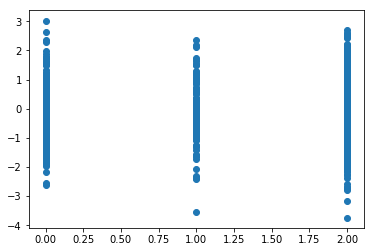

In [15]:
plt.scatter(X[:, 156], y)

In [ ]:
# 156 is important

In [16]:
pca_X = PCA(n_components=2).fit_transform(X)

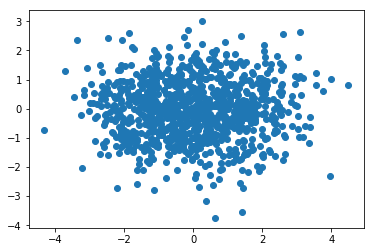

In [17]:
plt.scatter(pca_X[:, 0], y)

In [19]:
print(exp_data.shape)

(1000, 5000)


In [27]:
# generate table of R2 scores where
# R2_scores.ix[i, j] = 
#     R2 score of correlation
#     between SNP i and GENE j
R2_scores = pd.DataFrame(index=snp_data.columns, columns=exp_data.columns)

for gene in exp_data.columns:
    y = list(exp_data[gene])
    for snp in snp_data.columns:
        x = snp_data[snp].values.reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        score = reg.score(x, y) # compute the R2 score
        R2_scores.loc[snp, gene] = score
        
R2_scores.to_csv("gene_snp_scores.txt", header=True, index=True)

KeyboardInterrupt: 

In [ ]:
print("hikj")

In [28]:
print(R2_scores)

          Gene_RTH04   Gene_OQX53   Gene_CIC95   Gene_RBA22   Gene_GQO03  \
SNP_1    8.07838e-08  0.000855909  0.000505591  3.89258e-06   0.00161584   
SNP_2    0.000259449   0.00153095  9.44682e-07  3.49938e-05  1.24586e-06   
SNP_3    1.01408e-05  0.000512227   0.00117161    0.0024444  7.38633e-08   
SNP_4    9.71995e-05  0.000911784  1.82325e-05   0.00403789  1.20265e-05   
SNP_5    0.000146936    0.0013471  0.000874632  0.000139007   0.00310747   
SNP_6    3.08829e-05  0.000170206   0.00164788  0.000691925  0.000422148   
SNP_7    0.000265725  0.000356621   0.00160302  2.94581e-06  0.000191137   
SNP_8    0.000738055   0.00149709   0.00250215   0.00100394  6.02608e-05   
SNP_9    0.000646347   0.00150589  1.44896e-05  0.000895013    0.0105408   
SNP_10    0.00117525   0.00276649   0.00211507   0.00178099   6.6721e-06   
SNP_11   9.68779e-08   0.00111563   0.00151438  3.84986e-07  0.000389068   
SNP_12   3.14066e-05    0.0028062  3.98379e-05  5.06481e-06   0.00206371   
SNP_13   0.0

In [29]:

R2_scores.to_csv("gene_snp_scores.txt", header=True, index=True)

In [43]:
count = 0
for gene in R2_scores.columns:
    if np.isnan(R2_scores.loc[:, gene].values.astype(np.float32)).any():
        count += 1
        print(gene)
print(count)

Gene_YRK25
Gene_PYX78
Gene_HIP06
Gene_ALH91
Gene_BYB41
Gene_HAU01
Gene_EKW89
Gene_JPN21
Gene_CHK34
Gene_VPR71
Gene_JPW71
Gene_NYQ88
Gene_VLR81
Gene_PPR88
Gene_WXV31
Gene_QYS63
Gene_AUB94
Gene_IWY02
Gene_YDF13
Gene_ZKI69
Gene_ZGW95
Gene_YXZ24
Gene_KCQ96
Gene_OSY33
Gene_AYO60
Gene_EWR62
Gene_VHW02
Gene_BFL44
Gene_KDX58
Gene_CZS88
Gene_UEI22
Gene_RIK78
Gene_MVI12
Gene_FRK05
Gene_RHJ79
Gene_OZF71
Gene_TUH52
Gene_KRD03
Gene_IGC78
Gene_IUV29
Gene_IVJ54
Gene_BXP87
Gene_NYG41
Gene_NIN81
Gene_ONM21
Gene_JCZ28
Gene_MPU96
Gene_TLK73
Gene_HQV30
Gene_OJW53
Gene_FTM88
Gene_RUB38
Gene_FMZ29
Gene_GQN51
Gene_TKF21
Gene_YGL41
Gene_BSB25
Gene_QSI23
Gene_LIE47
Gene_IJZ63
Gene_TXS26
Gene_WSK64
Gene_NPH32
Gene_JNI55
Gene_WMP32
Gene_LPI36
Gene_DDV22
Gene_EGL21
Gene_ZTQ93
Gene_UOO12
Gene_BJC76
Gene_YBB14
Gene_NAQ07
Gene_PZU69
Gene_OYO35
Gene_BGH69
Gene_OFU09
Gene_SLF86
Gene_MNP19
Gene_WMV14
Gene_WPA05
Gene_AVO50
Gene_MHJ05
Gene_OQI36
Gene_QXT47
Gene_ONU60
Gene_DHF30
Gene_LAS87
Gene_YCN35
Gene_KRK10
Gene_BYR46

Gene_CBQ06
Gene_IDJ99
Gene_YPG49
Gene_NUU66
Gene_LZJ80
Gene_VHF37
Gene_OEQ11
Gene_QXQ82
Gene_FWI30
Gene_AOL41
Gene_ZNJ38
Gene_JOT83
Gene_ZLV89
Gene_QXH10
Gene_SIK22
Gene_SIW42
Gene_CES11
Gene_WAM17
Gene_AWV54
Gene_SHF18
Gene_VQT81
Gene_HAH23
Gene_JJG87
Gene_HUL31
Gene_MZO83
Gene_DQO32
Gene_UYC26
Gene_BRC26
Gene_XWO86
Gene_CKP00
Gene_DNO20
Gene_PJD18
Gene_DBG13
Gene_MYF82
Gene_FUO91
Gene_RLI02
Gene_YYP13
Gene_VBV49
Gene_XZF19
Gene_ZGZ67
Gene_INR00
Gene_PIB21
Gene_ENC18
Gene_HJR14
Gene_QGD62
Gene_AGF70
Gene_LMC94
Gene_GTL01
Gene_IMV47
Gene_MTW02
Gene_SNV70
Gene_WIK74
Gene_JPH18
Gene_WTW95
Gene_LPT33
Gene_ENK90
Gene_ALC94
Gene_OXL25
Gene_ZBM20
Gene_FCI14
Gene_DNQ00
Gene_NDH24
Gene_QGW68
Gene_CSP28
Gene_MEV25
Gene_DKP05
Gene_GJG42
Gene_YWE50
Gene_COP45
Gene_KDY28
Gene_EWP19
Gene_ONX33
Gene_MBE55
Gene_QFQ62
Gene_TSD93
Gene_ZGD30
Gene_GGP94
Gene_OPS22
Gene_MHB60
Gene_DBX21
Gene_YCT28
Gene_WRO75
Gene_WQJ53
Gene_SXV24
Gene_KCF39
Gene_SQT68
Gene_RDJ03
Gene_FDH23
Gene_EYU03
Gene_PPY09
Gene_PBA07

Gene_KPH79
Gene_WBL50
Gene_ZIV70
Gene_AFC42
Gene_QHA89
Gene_LPK56
Gene_ZUY09
Gene_OAM35
Gene_LZY32
Gene_KKG23
Gene_YQH11
Gene_RBU66
Gene_EZC15
Gene_EXD14
Gene_FOV68
Gene_JKE06
Gene_LIK26
Gene_RFR29
Gene_MEN85
Gene_RTY50
Gene_OLQ56
Gene_TMQ12
Gene_EUU32
Gene_AGO98
Gene_BIE14
Gene_ERN99
Gene_BYM34
Gene_QDV93
Gene_QBR33
Gene_DCS16
Gene_BGP46
Gene_KNH51
Gene_FMF60
Gene_KBP25
Gene_HIF25
Gene_BDF26
Gene_QPH22
Gene_GVA06
Gene_ZKN99
Gene_GZV57
Gene_MVD94
Gene_XYW40
Gene_QCD26
Gene_HYP94
Gene_DOZ94
Gene_GMJ37
Gene_XJQ84
Gene_QBQ29
Gene_JSB94
Gene_LJL71
Gene_JSX18
Gene_NCO95
Gene_FDU51
Gene_VAI48
Gene_LJB06
Gene_DWX36
Gene_YCL27
Gene_XKS45
Gene_BKW63
Gene_EMR56
Gene_LCD83
Gene_QQP09
Gene_CWY99
Gene_LZD34
Gene_RKP86
Gene_PDA28
Gene_YHK05
Gene_BVY63
Gene_LNZ55
Gene_NUY63
Gene_FDQ47
Gene_TTC91
Gene_NXU60
Gene_CNU92
Gene_QSK02
Gene_LRO15
Gene_WHJ20
Gene_GAP11
Gene_MUL27
Gene_BSN78
Gene_WRK20
Gene_ZEL01
Gene_OTG45
Gene_OIR22
Gene_REK19
Gene_EKM16
Gene_AQW35
Gene_QRK51
Gene_BRF40
Gene_GCP65
Gene_XEJ57

Gene_PFC20
Gene_KET95
Gene_CNM14
Gene_DTB27
Gene_SRT32
Gene_AEX90
Gene_VTA38
Gene_LFY97
Gene_YAE09
Gene_CGE50
Gene_MVI24
Gene_XBC13
Gene_DNP13
Gene_TCQ91
Gene_YEX42
Gene_WPD60
Gene_HGP84
Gene_TDM93
Gene_DXB73
Gene_RFD16
Gene_KOM20
Gene_NLM86
Gene_LPJ94
Gene_OQS19
Gene_RCK36
Gene_SHL54
Gene_PEY21
Gene_OCG12
Gene_SXI51
Gene_NQC72
Gene_RIR60
Gene_QII57
Gene_QTQ38
Gene_KXG71
Gene_ARJ39
Gene_GIT15
Gene_BDE28
Gene_DIF33
Gene_VME55
Gene_HJM53
Gene_OUM01
Gene_GGH38
Gene_SFX79
Gene_HBK82
Gene_ALK80
Gene_KHB95
Gene_RTR33
Gene_XQB66
Gene_LQL40
Gene_KYQ11
Gene_RMZ21
Gene_CIN24
Gene_JAL43
Gene_VIE48
Gene_KDE57
Gene_AZI68
Gene_PPT19
Gene_LCP10
Gene_FOQ43
Gene_TSQ42
Gene_RWE01
Gene_CFW42
Gene_ONB83
Gene_GWX83
Gene_QVI10
Gene_ASS76
Gene_DVE97
Gene_PNG88
Gene_QTL04
Gene_FPE13
Gene_RQQ28
Gene_PFK25
Gene_NTA69
Gene_DJF41
Gene_HTF46
Gene_VQA99
Gene_SRB24
Gene_GOZ18
Gene_CFG02
Gene_UDI55
Gene_HGL61
Gene_WXY61
Gene_KAK49
Gene_BJI24
Gene_NGZ11
Gene_UKU84
Gene_BWQ33
Gene_ULT31
Gene_ODU52
Gene_XBQ20
Gene_BIP66

In [44]:
count

4851